# START NB

Ce nb est destiné à la découverte des données afin d'établir un stratégie de pre-processing qui soit adaptée.

In [52]:
# imports

# Base
import importlib
import functions
importlib.reload(functions)
from functions import *

# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [53]:
# Better visualization settings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [54]:
# Read the csvs

FOLDER_PATH = "data/"

TEST_PATH = FOLDER_PATH + "test.csv" 
TRAIN_PATH = FOLDER_PATH + "train.csv"
SAMPLE_PATH = FOLDER_PATH + "sample_submission.csv" 

df_test = pd.read_csv(TEST_PATH, engine='python', header=None, on_bad_lines='skip')
df_train = pd.read_csv(TRAIN_PATH, engine='python', header=None, on_bad_lines='skip')
df_sample = pd.read_csv(SAMPLE_PATH, engine='python', header=None, on_bad_lines='skip')

df_train.rename(columns={0: 'util', 1: 'navigateur'}, inplace=True)
df_test.rename(columns={0: 'navigateur'}, inplace=True)

In [55]:
df_test.head(5)

,navigateur,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0,Microsoft Edge,Saisie dans un champ,t5,Saisie dans un champ,Exécution d'un bouton,t10,Exécution d'un bouton(fr.infologic.core.client...,t15,Exécution d'un bouton(fr.infologic.core.client...,Affichage d'une dialogue(fr.infologic.core.cli...,...,t535,Exécution d'un bouton,Exécution d'un bouton,Double-clic,Exécution d'un bouton,t540,Affichage d'une dialogue(fr.infologic.core.cli...,Exécution d'un bouton,Fermeture d'une dialogue,Fermeture de session
1,Firefox,Affichage d'une dialogue(infologic.acti.module...,t5,Saisie dans un champ,Fermeture d'une dialogue,t10,Raccourci,t10,Exécution d'un bouton,Fermeture d'une dialogue,...,None,None,None,None,None,None,None,None,None,None
2,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,Affichage d'un toast,Filtrage / Tri,t5,Exécution d'un bouton(MAINT),...,None,None,None,None,None,None,None,None,None,None
3,Firefox,Lancement d'une stat(infologic.core.gui.contro...,t5,Lancement d'une stat,t10,Lancement d'une stat,t15,Lancement d'une action générique,t20,Création d'un écran(infologic.core.gui.control...,...,None,None,None,None,None,None,None,None,None,None
4,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Création d'un écran(infologic.orga.modules.OR_...,Exécution d'un bouton<TELEM_MINIMAL>,Lancement d'une action générique,t10,Affichage d'une dialogue,t15,Exécution d'un bouton,...,None,None,None,None,None,None,None,None,None,None


In [56]:
df_train.head(5)

,util,navigateur,2,3,4,5,6,7,8,9,...,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129
0,nuh,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,...,Lancement d'une stat(infologic.core.gui.contro...,t2905,Affichage d'un toast,t2905,Exécution d'un bouton(MAINT),Sélection d'un écran,Retour sur un écran(infologic.core.accueil.Acc...,Affichage d'un toast,Filtrage / Tri,Fermeture de session
1,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,...,None,None,None,None,None,None,None,None,None,None
2,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,...,None,None,None,None,None,None,None,None,None,None
3,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,...,None,None,None,None,None,None,None,None,None,None
4,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,...,None,None,None,None,None,None,None,None,None,None


In [57]:
df_sample.head(5)

,0,1
0,RowId,prediction
1,1,abc
2,2,abc
3,3,abc
4,4,abc


## Exploration

In [58]:
df_train.shape, df_test.shape, df_sample.shape

((3135, 3130), (153, 418), (325, 2))

In [59]:
spot_columns(df_train, percent=0)

Column '4' has 0.03% NaN values
Column '5' has 0.06% NaN values
Column '6' has 0.06% NaN values
Column '7' has 0.06% NaN values
Column '8' has 0.06% NaN values
Column '9' has 0.10% NaN values
Column '10' has 0.10% NaN values
Column '11' has 0.10% NaN values
Column '12' has 0.10% NaN values
Column '13' has 0.10% NaN values
Column '14' has 0.10% NaN values
Column '15' has 0.10% NaN values
Column '16' has 0.10% NaN values
Column '17' has 0.10% NaN values
Column '18' has 0.10% NaN values
Column '19' has 0.10% NaN values
Column '20' has 0.10% NaN values
Column '21' has 0.10% NaN values
Column '22' has 0.10% NaN values
Column '23' has 0.13% NaN values
Column '24' has 0.13% NaN values
Column '25' has 0.13% NaN values
Column '26' has 0.13% NaN values
Column '27' has 0.13% NaN values
Column '28' has 0.13% NaN values
Column '29' has 0.13% NaN values
Column '30' has 0.13% NaN values
Column '31' has 0.13% NaN values
Column '32' has 0.13% NaN values
Column '33' has 0.13% NaN values
Column '34' has 

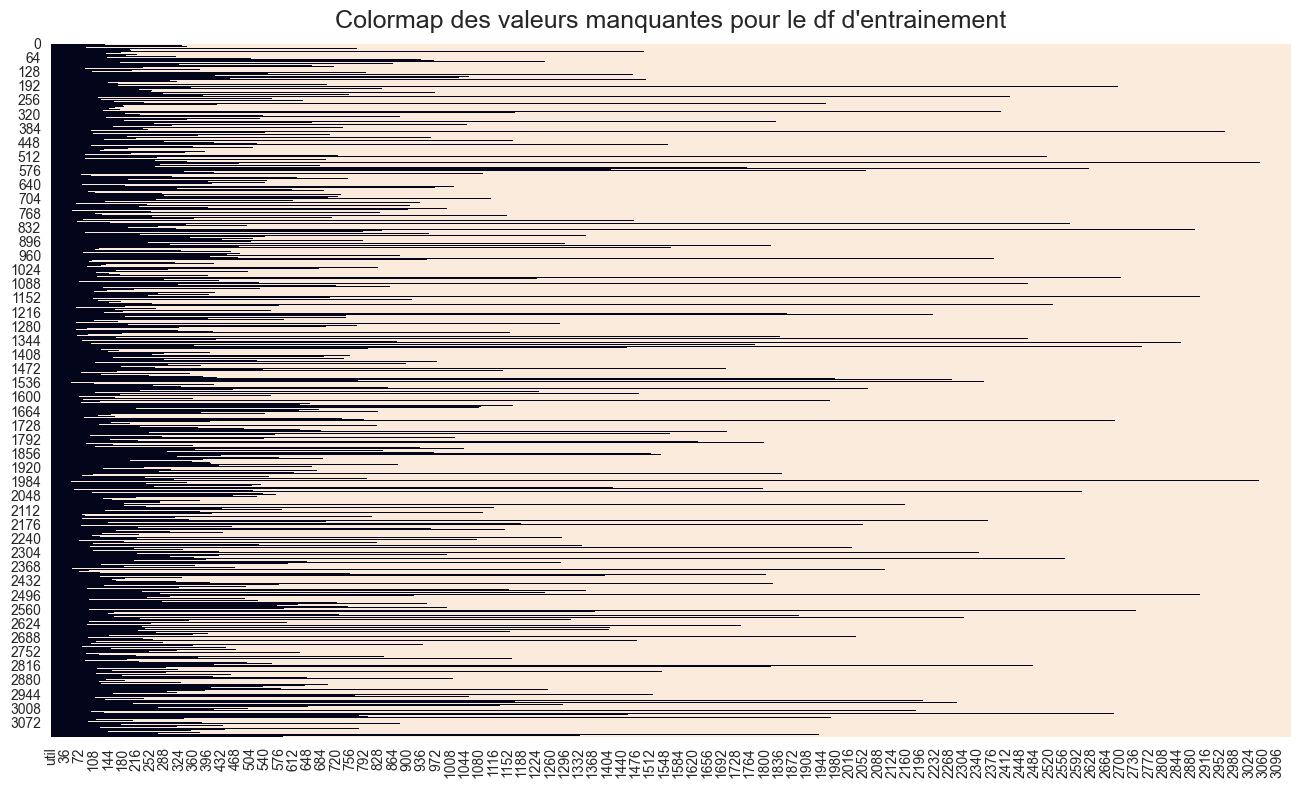

In [60]:
nan_colormap(df_train, 'Colormap des valeurs manquantes pour le df d\'entrainement')

# Après observation de la colormap, je pense que les solutions les plus pertinentes pour remplacer
# les valeurs manquantes sont soit de remplacer par des 0 et d'indiquer dans une colonne sous jacente que
# la valeure est originalement manquante, soit de remplacer par la moyenne et de ne rien indiquer. 

# Nouvelle stratégie : Comme on le voit dans la sortie précédente, il y a très peu de NaNs dans chacune 
# des colonnes. Je vais donc remplacer les NaNs par la médiane dans toutes les colonnes où il y a moins de 
# 20% de NaNs et ensuite utiliser une technique de prédiction.

In [61]:
# Missing cells 

total_cells = df_train.shape[0] * df_train.shape[1]
missing_cells = df_train.isna().sum().sum()
print(f"\nTotal cells: {total_cells:,}")
print(f"Missing cells: {missing_cells:,} ({100*missing_cells/total_cells:.2f}%)")


Total cells: 9,812,550
Missing cells: 7,739,390 (78.87%)


In [62]:
# Missing per row (session length analysis)
missing_per_row = df_train.isna().sum(axis=1)
non_missing_per_row = df_train.notna().sum(axis=1) - (2 if True else 1)  # exclude util/navigateur

print(f"\nSession length statistics (number of actions):")
print(non_missing_per_row.describe())



Session length statistics (number of actions):
count    3135.000000
mean      659.295056
std       659.060687
min         2.000000
25%       186.000000
50%       394.000000
75%       893.500000
max      3128.000000
dtype: float64


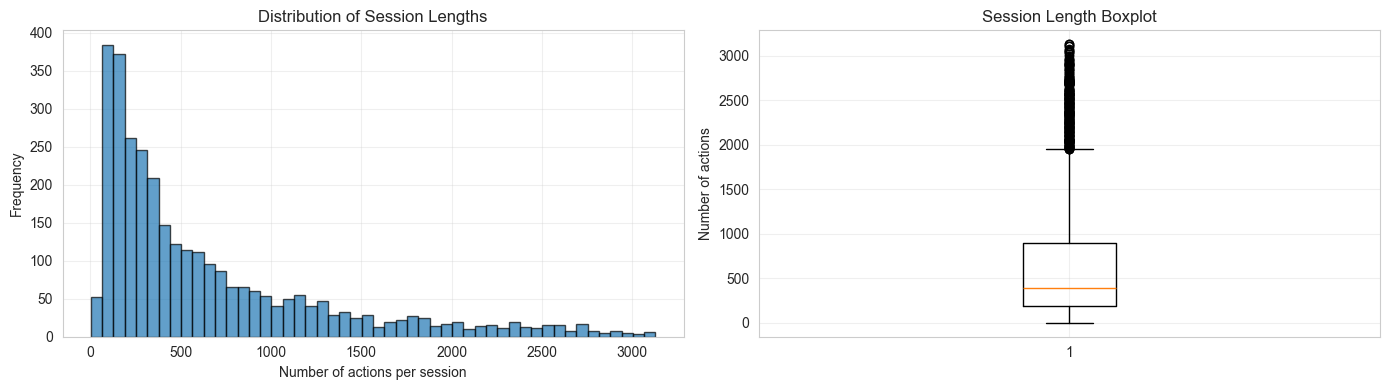

In [63]:
plt.figure(figsize=(14, 4))
    
plt.subplot(1, 2, 1)
plt.hist(non_missing_per_row, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Number of actions per session')
plt.ylabel('Frequency')
plt.title('Distribution of Session Lengths')
plt.grid(alpha=0.3)
    
plt.subplot(1, 2, 2)
plt.boxplot(non_missing_per_row, vert=True)
plt.ylabel('Number of actions')
plt.title('Session Length Boxplot')
plt.grid(alpha=0.3)
    
plt.tight_layout()
plt.show()

navigateur
Firefox           1401
Google Chrome     1273
Microsoft Edge     438
Opera               23
Name: count, dtype: int64


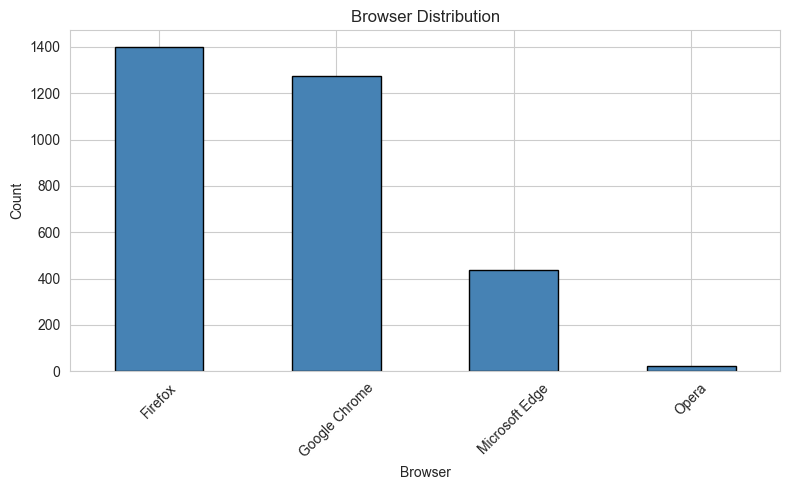

TARGET VARIABLE (USERS) DISTRIBUTION

Number of unique users: 246

Sessions per user statistics:
count    246.000000
mean      12.743902
std        8.948119
min        3.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       75.000000
Name: count, dtype: float64


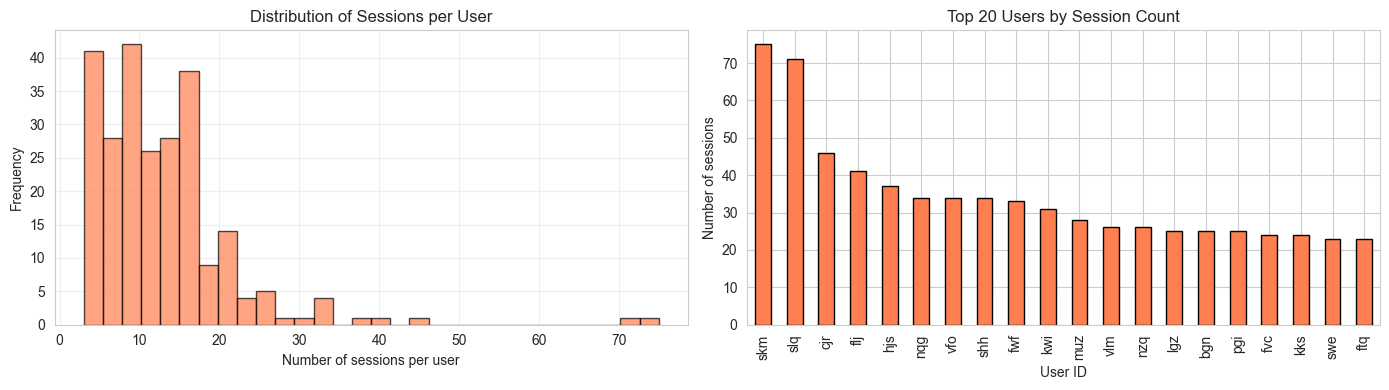

In [64]:

browser_col = 'navigateur'
print(df_train[browser_col].value_counts())
    
plt.figure(figsize=(8, 5))
df_train[browser_col].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Browser Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    
if 'util' in df_train.columns:
    print("TARGET VARIABLE (USERS) DISTRIBUTION")
    user_counts = df_train['util'].value_counts()
    print(f"\nNumber of unique users: {df_train['util'].nunique()}")
    print(f"\nSessions per user statistics:")
    print(user_counts.describe())
        
    plt.figure(figsize=(14, 4))
        
    plt.subplot(1, 2, 1)
    plt.hist(user_counts, bins=30, edgecolor='black', alpha=0.7, color='coral')
    plt.xlabel('Number of sessions per user')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sessions per User')
    plt.grid(alpha=0.3)
        
    plt.subplot(1, 2, 2)
    user_counts.head(20).plot(kind='bar', color='coral', edgecolor='black')
    plt.xlabel('User ID')
    plt.ylabel('Number of sessions')
    plt.title('Top 20 Users by Session Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()